In [71]:
#GOOD
import pandas as pd
import numpy as np
import random

# Set a seed for reproducibility
np.random.seed(42)

# Column names
columns = ["ID", "Major", "Gender", "Age", "School_Type", "Language", "Highschool_Sector", "Highschool_Grade", "Semester_1_GPA", "Semester_2_GPA", "Semester_3_GPA", "Current_CGPA", "Programming_Subjects_GPA", "Maths_GPA", "Survey_Average", "Attendance_Warnings", "Behavioural_Warnings"]

rows = []

# Generate and print 270 rows of data
for i in range(270):
    student_id = f"2022{i+1:05d}"
    major = random.choices(["DSAI", "SWD", "IT"], weights=[0.68, 0.24, 0.08])[0]
    school_type = random.choices(["Private", "International", "National"], weights=[0.35, 0.15, 0.5])[0]  # School Type

    # Generating GPAs using a normal distribution
    base_gpa = max(min(round(np.random.normal(loc=2.7, scale=0.5), 2), 4), 0)
    semester_1_gpa = max(min(base_gpa + np.random.normal(loc=0, scale=(4-base_gpa)/3), 4), 0)
    semester_2_gpa = max(min(base_gpa + np.random.normal(loc=0, scale=(4-base_gpa)/3), 4), 0)
    semester_3_gpa = max(min(base_gpa + np.random.normal(loc=0, scale=(4-base_gpa)/3), 4), 0)
    # Introduce some students who significantly improve or decline
    if random.random() < 0.05:  # 5% chance
        semester_3_gpa = max(min(round(np.random.normal(loc=2.0, scale=0.5), 2), 4), 0)  # decline
    elif random.random() < 0.05:  # 5% chance
        semester_3_gpa = max(min(round(np.random.normal(loc=4.0, scale=0.5), 2), 4), 0)  # improve

    # Adjusting the distribution to reflect the specified scenario
    current_cgpa = round((semester_1_gpa+semester_2_gpa+semester_3_gpa)/3, 2)

    programming_subjects_gpa = max(min(round(np.random.normal(loc=3.0, scale=0.5), 2), 4), 0)
    maths_gpa = max(min(round(np.random.normal(loc=3.0, scale=0.5), 2), 4), 0)

    row = [
        student_id,  # ID
        major,  # Major
        random.choice(["Male", "Female"]),  # Gender
        random.randint(18, 20),  # Age
        school_type,    
        random.choice(["English", "Arabic"]),  # Language
        random.choice(["Science", "Maths"]),  # Highschool Sector
        random.uniform(65, 93),  # Highschool Grade
        semester_1_gpa,
        semester_2_gpa,
        semester_3_gpa,
        current_cgpa,
        programming_subjects_gpa,
        maths_gpa,
        random.randint(1, 5),  # Survey Average (modified to 1-5)
        random.randint(0, 3),  # Attendance Warnings
        random.randint(0, 3)  # Behavioural Warnings
    ]
    rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows, columns=columns)
#save to csv
df.to_csv("student_data.csv", index=False)

In [72]:
df.describe()

,Age,Highschool_Grade,Semester_1_GPA,Semester_2_GPA,Semester_3_GPA,Current_CGPA,Programming_Subjects_GPA,Maths_GPA,Survey_Average,Attendance_Warnings,Behavioural_Warnings
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,19.066667,78.956246,2.725628,2.692123,2.729564,2.715630,3.034333,3.012519,3.055556,1.425926,1.366667
std,0.810709,8.357597,0.665327,0.672691,0.753216,0.548347,0.465541,0.506780,1.419679,1.160084,1.122100
min,18.000000,65.102673,0.082929,0.244484,0.000000,0.310000,1.560000,1.580000,1.000000,0.000000,0.000000
25%,18.000000,71.975118,2.360322,2.313171,2.315253,2.375000,2.720000,2.645000,2.000000,0.000000,0.000000
50%,19.000000,79.202192,2.805575,2.780277,2.791118,2.760000,3.020000,3.010000,3.000000,1.000000,1.000000
75%,20.000000,85.962962,3.204815,3.180527,3.272718,3.097500,3.360000,3.350000,4.000000,2.000000,2.000000
max,20.000000,92.949662,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000


In [55]:
import pandas as pd
import random

# Function to generate random values for average rating, average grade, and pass count
def generate_values(course_code):
    average_rating = round(random.randint(1, 5), 2)
    
    if course_code.startswith(('SW', 'PHS')):
        pass_count = random.randint(30, 50)
        fail_count = 60 - pass_count
    elif course_code.startswith('DSAI'):
        pass_count = random.randint(115, 135)
        fail_count = 184 - pass_count
    elif course_code.startswith('IT'):
        pass_count = random.randint(16, 19)
        fail_count = 22 - pass_count
    elif course_code.startswith(('CSAI', 'MATH')):
        pass_count = random.randint(200, 240)
        fail_count = 270 - pass_count
    else:
        pass_count = fail_count = None
    
    average_grade = random.randint(65, 91)
    
    return average_rating, average_grade, pass_count, fail_count

# Data for the courses
courses = [
    'CSAI 100', 'CSAI 101', 'CSAI 102', 'CSAI 151', 'CSAI 201', 'CSAI 202', 'CSAI 203',
    'CSAI 252', 'MATH 103', 'MATH 104', 'MATH 105', 'MATH 308', 'PHYS 103', 'PHYS 104', 'SW 151',
    'CSAI 205', 'DSAI 103', 'DSAI 104', 'DSAI 203', 'IT 101', 'IT 102', 'IT 205', 'IT 103'
]

# Create a DataFrame
df_data = {
    'Course_ID': courses,
    'Average_Rating': [],
    'Average_Grade': [],
    'Pass_Count': [],
    'Fail_Count': [],
}

for course in courses:
    avg_rating, avg_grade, pass_count, fail_count = generate_values(course)
    df_data['Average_Rating'].append(avg_rating)
    df_data['Average_Grade'].append(avg_grade)
    df_data['Pass_Count'].append(pass_count)
    df_data['Fail_Count'].append(fail_count)

df2 = pd.DataFrame(df_data)

# Save the DataFrame to a CSV file
df2.to_csv('courses_dataset.csv', index=False)



In [56]:
df2.head()

,Course_ID,Average_Rating,Average_Grade,Pass_Count,Fail_Count
0,CSAI 100,5,81,211.0,59.0
1,CSAI 101,1,77,224.0,46.0
2,CSAI 102,2,91,228.0,42.0
3,CSAI 151,4,87,228.0,42.0
4,CSAI 201,1,87,207.0,63.0


In [57]:
df2.describe()

,Average_Rating,Average_Grade,Pass_Count,Fail_Count
count,23.000000,23.000000,21.000000,21.000000
mean,3.000000,80.130435,158.952381,41.523810
std,1.705606,7.368880,84.641879,22.435728
min,1.000000,65.000000,16.000000,3.000000
25%,1.000000,75.000000,119.000000,32.000000
50%,4.000000,80.000000,207.000000,47.000000
75%,4.500000,87.000000,223.000000,61.000000
max,5.000000,91.000000,238.000000,68.000000


In [73]:
import seaborn as sns

<AxesSubplot: xlabel='Current_CGPA', ylabel='Count'>

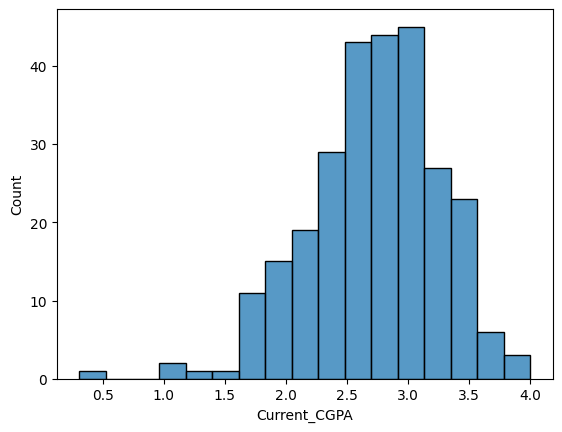

In [74]:
sns.histplot(df["Current_CGPA"])

In [4]:
import pandas as pd
df = pd.read_csv("courses_dataset.csv")
df1 = pd.read_csv("instructors_dataset.csv")
df2 = pd.read_csv("student_data.csv")
df2.head()

,ID,Major,Gender,Age,School_Type,Language,Highschool_Sector,Highschool_Grade,Semester_1_GPA,Semester_2_GPA,Semester_3_GPA,Current_CGPA,Programming_Subjects_GPA,Maths_GPA,Survey_Average,Attendance_Warnings,Behavioural_Warnings
0,202200001,DSAI,Male,19,Private,English,Maths,65.616030,2.901607,3.176691,3.483060,3.19,2.88,2.88,3,1,0
1,202200002,DSAI,Male,20,Private,English,Maths,71.527249,3.620464,3.410189,3.582235,3.54,2.77,2.77,1,1,2
2,202200003,DSAI,Female,20,National,Arabic,Science,76.148908,2.067443,2.141532,2.598834,2.27,2.49,3.16,3,2,0
3,202200004,IT,Male,20,Private,English,Maths,66.023960,1.426156,3.104962,2.118297,2.22,3.03,2.29,1,0,3
4,202200005,DSAI,Male,20,International,English,Science,87.386652,2.488049,1.827647,2.626615,2.31,2.70,2.85,3,3,3


In [5]:
import timeit

x =  252% 198

print(x)


y = 3 // 15
r = 3 - y * 15
print(r, y)


54
3 0


In [ ]:
gcd(252,198) = 18
g